No water oxygens found in the trajectory!


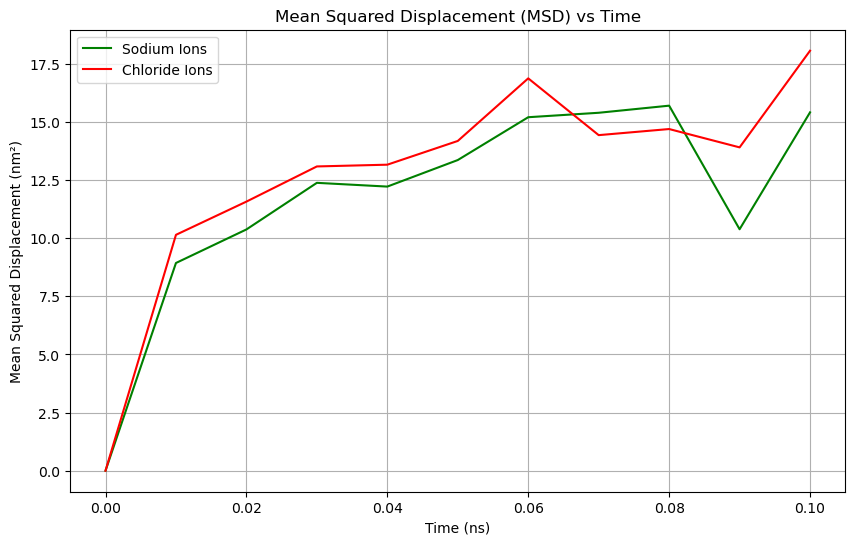

In [7]:
import os
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology files
trajectory = md.load('/home/yhp2008/comp-lab-class-2024/Week4-CharmmGuiSetup/NACL/charmm-gui-2792251971/gromacs/combined.xtc', top='/home/yhp2008/comp-lab-class-2024/Week4-CharmmGuiSetup/NACL/charmm-gui-2792251971/gromacs/step3_input.gro')


# Ensure the Figures directory exists
if not os.path.exists('Figures'):
    os.makedirs('Figures')



# Select indices for different atom groups based on your PDB file
water_oxygen_indices = trajectory.topology.select("name OH2 and resname TIP3")
sodium_indices = trajectory.topology.select("name SOD")
chloride_indices = trajectory.topology.select("name CLA")

# Check if selections are empty and print warnings
if len(water_oxygen_indices) == 0:
    print("No water oxygens found in the trajectory!")
if len(sodium_indices) == 0:
    print("No sodium ions found in the trajectory!")
if len(chloride_indices) == 0:
    print("No chloride ions found in the trajectory!")

# Helper function to compute MSD
def compute_msd(positions):
    n_frames = positions.shape[0]
    msd = np.zeros(n_frames)

    for t in range(1, n_frames):
        displacements = positions[t:] - positions[:-t]
        squared_displacements = np.sum(displacements**2, axis=-1)
        msd[t] = np.mean(squared_displacements)

    return msd

# Extract positions for each atom group
if len(water_oxygen_indices) > 0:
    water_positions = trajectory.atom_slice(water_oxygen_indices).xyz
    msd_water = compute_msd(water_positions)
else:
    msd_water = None

if len(sodium_indices) > 0:
    sodium_positions = trajectory.atom_slice(sodium_indices).xyz
    msd_sodium = compute_msd(sodium_positions)
else:
    msd_sodium = None

if len(chloride_indices) > 0:
    chloride_positions = trajectory.atom_slice(chloride_indices).xyz
    msd_chloride = compute_msd(chloride_positions)
else:
    msd_chloride = None

# Time points (assuming trajectory is recorded every 10 ps)
time = np.arange(len(trajectory)) * 10e-3  # Convert to ns

# Plot MSD vs Time
plt.figure(figsize=(10, 6))

if msd_water is not None:
    plt.plot(time[:len(msd_water)], msd_water, label='Water Oxygens', color='blue')
if msd_sodium is not None:
    plt.plot(time[:len(msd_sodium)], msd_sodium, label='Sodium Ions', color='green')
if msd_chloride is not None:
    plt.plot(time[:len(msd_chloride)], msd_chloride, label='Chloride Ions', color='red')

plt.xlabel('Time (ns)')
plt.ylabel('Mean Squared Displacement (nm²)')
plt.title('Mean Squared Displacement (MSD) vs Time')
plt.legend()
plt.grid(True)

# Save the figure in the Figures folder
plt.savefig('Figures/msd_plot.png')

# Show the plot
plt.show()
